(26, 156) (26, 8)
Epoch 1/10
26/26 [==============================] - 1s 38ms/step - loss: 6.9253 - acc: 0.0000e+00
Epoch 2/10
26/26 [==============================] - 0s 219us/step - loss: 6.3263 - acc: 1.0000
Epoch 3/10
26/26 [==============================] - 0s 241us/step - loss: 6.0291 - acc: 1.0000
Epoch 4/10
26/26 [==============================] - 0s 260us/step - loss: 5.9014 - acc: 1.0000
Epoch 5/10
26/26 [==============================] - 0s 363us/step - loss: 5.9271 - acc: 1.0000
Epoch 6/10
26/26 [==============================] - 0s 318us/step - loss: 5.9601 - acc: 0.0000e+00
Epoch 7/10
26/26 [==============================] - 0s 403us/step - loss: 5.9118 - acc: 1.0000
Epoch 8/10
26/26 [==============================] - 0s 156us/step - loss: 5.9446 - acc: 0.0000e+00
Epoch 9/10
26/26 [==============================] - 0s 236us/step - loss: 5.8330 - acc: 1.0000
Epoch 10/10
26/26 [==============================] - 0s 439us/step - loss: 5.8419 - acc: 1.0000


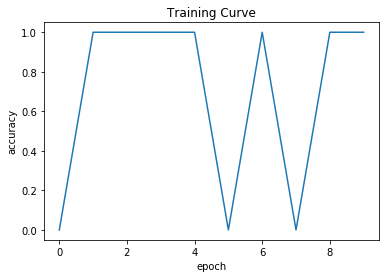

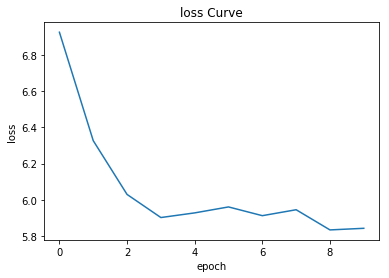

(156,)
[[0.02171228 0.23631205 0.01148797 0.1268609  0.13245606 0.18752363
  0.13232945 0.15131761]]


In [10]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, datasets, utils, losses

#(rows:312,cols:13)
#reshape the dataset into (rows: 26, cols: 156) shape
#which each row represent one letter format
letter = np.loadtxt("pattern1.txt")
a = []
for i in range(len(letter)):
    for j in range(len(letter[i])):
        a.append(letter[i][j])
index = 0
b = []
while index < 4056:
    b.append(a[i:i+156])
    index += 156
    
x_train = np.asarray(b)[::]
y_train = np.loadtxt("ASCII.txt")[::,0:9]

print(x_train.shape, y_train.shape)

inputs = layers.Input(shape = (156, ))
x = layers.Dense(156, activation = 'relu')(inputs)
x = layers.Dense(156, activation = 'relu')(x)
x = layers.Dense(156, activation = 'relu')(x)
x = layers.Dense(156, activation = 'relu')(x)
x = layers.Dense(156, activation = 'relu')(x)
#It might have some errors on the output layer's shape 
outputs = layers.Dense(8, activation = 'softmax')(x)

model = models.Model(inputs = inputs, outputs = outputs)


model.compile(loss = 'categorical_crossentropy',
             optimizer = 'Nadam', 
             metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 156, epochs =10)

#print (history.history.keys())
#training curve
plt.plot(history.history['acc'])
plt.title('Training Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
#loss curve
plt.plot(history.history['loss'])
plt.title('loss Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

p2 = np.loadtxt("pattern2.txt")

a2 = np.reshape(p2,(1,156))

prediction = model.predict(a2)
print (prediction)